# Homework Assigment 2

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [26]:
import requests
from bs4 import BeautifulSoup
def collect_all_titles_and_numbers(page_url):
    html = requests.get(page_url).content.decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    titles = soup.findAll('a', attrs={'class': 'storylink'})
    points = soup.findAll('span',attrs={'class': 'score'})
    score_list = [point.text.strip() for point in points]
    title_list =[title.text.strip() for title in titles]
    ans  = [(title,score) for title, score in zip(title_list,score_list)]
    return ans
    
result = collect_all_titles_and_numbers('https://news.ycombinator.com/')
for entry in result:
    print(f'title "{entry[0]}" had {entry[1]}')

title "Firefox Send: Free encrypted file transfer service" had 1284 points
title "Opioids and the Labor Market (2018)" had 88 points
title "Graying Out" had 296 points
title "Boeing 737 Max pilots complained to feds for months about suspected safety flaw" had 13 points
title "Silence is golden, especially when you need to say something important" had 71 points
title "Google’s new voice recognition system works instantly and offline (Pixel only)" had 56 points
title "On the Road to WebRTC 1.0, Including VP8" had 62 points
title "Researchers find trapdoor in SwissVote election system" had 153 points
title "Uber Self Driving Unit Burning 20M a Month" had 12 points
title "The Tragedy of Baltimore" had 78 points
title "Launch HN: Axdraft (YC W19) - Legal documents for startups in minutes" had 28 points
title "On “Open” Distros, Open Source, and Building a Company" had 224 points
title "An Insulin Index of Foods (1994)" had 125 points
title "Synthetic Sensors: Towards General-Purpose Sensing

**Question 2**:  Write a function that collects data on four Harry Potter movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [27]:
from tmdbv3api import TMDb
from tmdbv3api import Movie
tmdb = TMDb()
tmdb.api_key = 'a7672300d7403695bbcd01699c27215a'
tmdb.language = 'en'


def collect_movie_data(movie_names):
    """
    This fucntion gather information from the tmdb api about movies.
    param: movie_names is a list of movie names the api should return informatino about.
    """
    movie = Movie()
    for name in movie_names[:4]:
        search = movie.search(name)
        for res in search[:4]:
            print(f' the id of the movie is: {res.id}')
            print(f' the title of the movie is: {res.title}')
            print(f' overview: {res.overview}')
            print(f' the vote avg for the movies is: {res.vote_average}')
            print('-'*15)
            
            
collect_movie_data(['Harry Potter','lord of the rings'])


 the id of the movie is: 671
 the title of the movie is: Harry Potter and the Philosopher's Stone
 overview: Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a powerful wizard -- with a place waiting for him at the Hogwarts School of Witchcraft and Wizardry. As he learns to harness his newfound powers with the help of the school's kindly headmaster, Harry uncovers the truth about his parents' deaths -- and about the villain who's to blame.
 the vote avg for the movies is: 7.8
---------------
 the id of the movie is: 672
 the title of the movie is: Harry Potter and the Chamber of Secrets
 overview: Ignoring threats to his life, Harry returns to Hogwarts to investigate – aided by Ron and Hermione – a mysterious series of attacks.
 the vote avg for the movies is: 7.7
---------------
 the id of the movie is: 675
 the title of the movie is: Harry Potter and the Order of the Phoenix
 overview: Returning for his fif

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer following questions:

**Question 1:** In which month is there the highest number of projects? (15 pt)

In [1]:
import pandas as pd
import calendar

Db_Path = '../datasets/'
df= pd.read_csv(f'{Db_Path}ks-projects-201801.csv')

df['launch_month'] = pd.DatetimeIndex(df['launched']).month
df = df.drop_duplicates()
df2 = df.groupby(["launch_month"]).size().reset_index(name='counts')
df_max = df2.max()
print(f'the month with the highest number of projects launched at is {calendar.month_name[df_max["launch_month"]]} which had {df_max["counts"]} projects in it')

the month with the highest number of projects launched at is December which had 36367 projects in it


**Question 4:** Visualize your answer using matplotlib or seaborn (15pt)

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

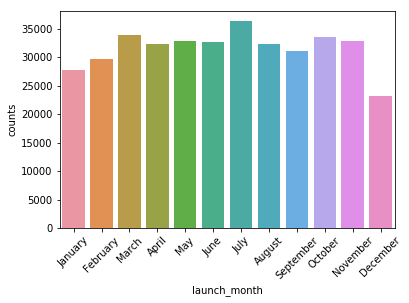

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
df3 = df2.copy()
df3["launch_month"] = df2['launch_month'].apply(lambda x: calendar.month_name[x])
ax = sns.barplot(x=df3["launch_month"],y=df3["counts"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer one of following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [49]:
import pandas as pd
import networkx as nx

Db_Path = '../datasets/'
df= pd.read_csv(f'{Db_Path}hero-network.csv')
print(df.shape)
df = df.drop_duplicates()
print(f'After removing duplicate the shape is:\n{df.shape}')
df2 = df.groupby(["hero1"]).size().reset_index(name='friendly').sort_values(['friendly'], ascending=[0])[:10]
most_friends = set(df2['hero1'])
most_friends

(574467, 2)
After removing duplicate the shape is:
(224181, 2)


{'CAPTAIN AMERICA',
 'HUMAN TORCH/JOHNNY S',
 'IRON MAN/TONY STARK ',
 'MR. FANTASTIC/REED R',
 'SCARLET WITCH/WANDA ',
 'SPIDER-MAN/PETER PAR',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'VISION ',
 'WOLVERINE/LOGAN '}

**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type (5pt)

In [8]:
import pandas as pd
import networkx as nx

Db_Path = '../datasets/'
df= pd.read_csv(f'{Db_Path}hero-network.csv')
print(df.shape)
df = df.drop_duplicates()
print(f'After removing duplicate the shape is:\n{df.shape}')
df2 = df.groupby(["hero1"]).size().reset_index(name='friendly').sort_values(['friendly'], ascending=[0])[:150]
most_friends = set(df2['hero1'])





(574467, 2)
After removing duplicate the shape is:
(224181, 2)


In [9]:
df3 = df[(df.hero1.isin(most_friends)) & (df.hero2.isin(most_friends))]
nodes = list(df2['hero1'])
node_size = list(map(lambda n: df2[df2['hero1']==n].iloc[0]['friendly'], nodes))

In [10]:
g = nx.Graph()
g.add_nodes_from(nodes)
edges_list = [(r['hero1'], r['hero2']) for i, r in df3.iterrows()]
g.add_edges_from(edges_list)

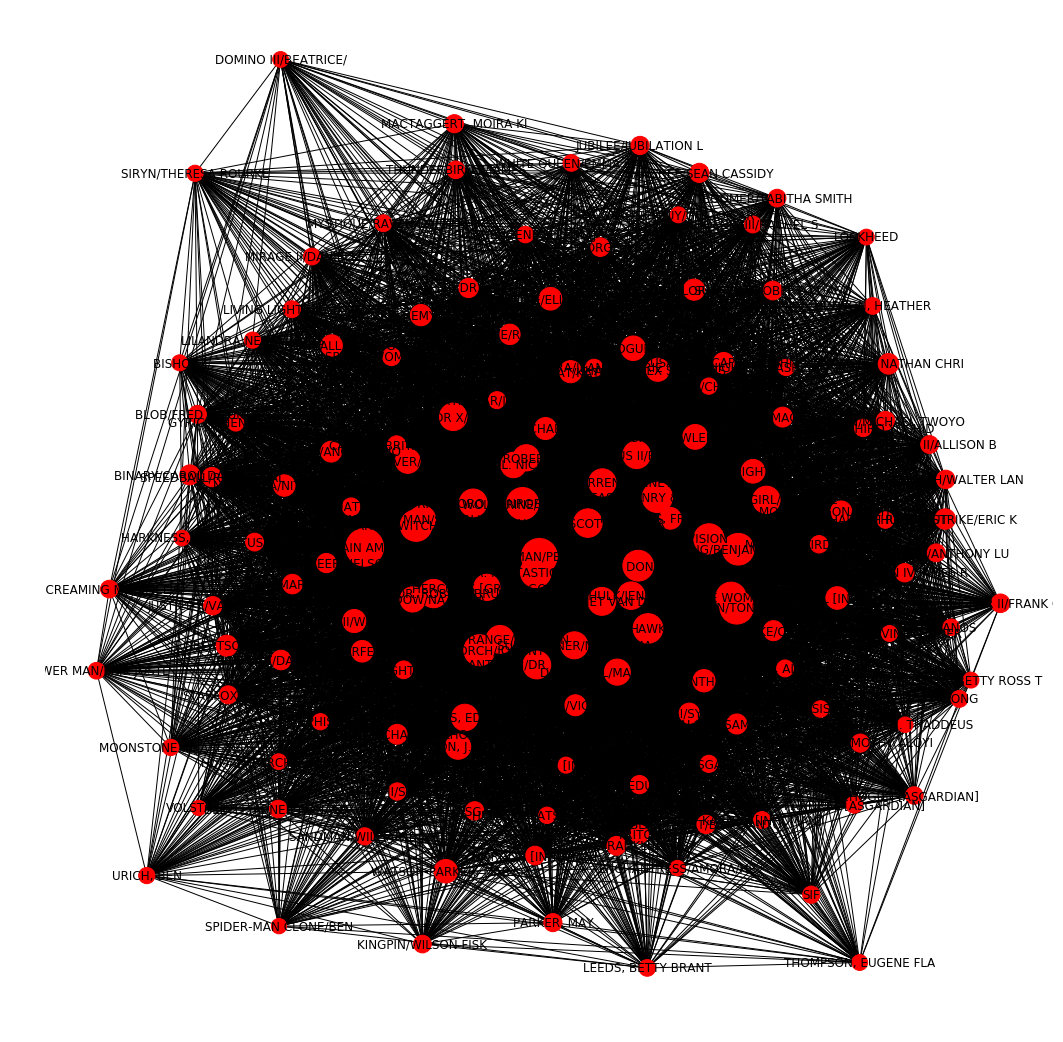

In [15]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(14,14))
nx.draw(g,with_labels=True, nodelist=nodes, node_size=node_size)
plt.show()

